# Twitter API
Sólo con cuenta de desarrollador API's que provee Twitter:

* Tweets : buscar, publicar, filtrar, transmitir, etc.
* Ads : análisis de audiencia
* DM : enviar y recibir, respuesta directa, mensajes de bienvenida, etc. (aún en prueba)
* Cuentas y usuarios : administración de cuentas e interacciones con usuarios
* Media : acceder y subir a la plataforma fotos, videos, gif's
* Trends : trending topics dada una localización
* Geo : información de lugares cerca de una localización

Librerías de Python para trabajar con la API de Twitter
* Tweepy (la más recomendada y utilizada)
* Python Twitter Tools
* Twython
* TwitterAPI
* TwitterSearch

## Recolección por medio de APIs
API (Aplication Programming Interface) es una biblioteca, un conjunto de funciones que ofrece una cierta aplicación para ser accesada por otra.

API Twiiter: tweepy Modo streaming

API REST (Representational State Transfer, transferencia de estado representacional) es un método sencillo para recibir y enviar datos en cualquier formato, XML, JSON. Para ello se utilizan funciones POST, GET, PUT, DELETE.

## RESTful API Cuenta de desarrollador de Twitter
Necesitamos:

Crear una APP en twitter, en la cual se generan las siguientes llaves: consumer key API-KEY consumer seceret key API-KEY Secret access token key access token secret key Instalar las librerías para trabajar con twitter desde python: tweepy

### conda install -c conda-forge tweepy

In [1]:
import os 
import pandas as pd
import tweepy as tw

In [2]:
#Crear un app, ir a Keys and Access Tokens (copiar)
#Click en "Create y accese Token Secret" (copiar)
#Credentials

consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""


#import json
#creds = {}
#creds["CONSUMER_KEY"] = ""
#creds["CONSUMER_SECRET"] = ""
#creds["ACCESS_TOKEN"] = ""
#creds["ACCESS_TOKN_SECRET"] = ""
#with open("twitter_creds.json", "w") as arch:
    #json.dump(creds, arch)

In [3]:
#se crea un objeto de la clase OAuthHandler para poder utilizar la API con python
auth = tw.OAuthHandler(consumer_key, consumer_secret) #objeto

#credenciales para utilizar la API, en
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth, wait_on_rate_limit=True)
#objeto de la clase API, que nos permitirá realizar las consulta

In [4]:
#Ejemplo: dos variables de búsqueda
search_words = "#wildfires" #<- busqueda con este hashtag
date_since = "2018-11-16"

In [5]:
#Colecta los tweets según nuestras variables
#Buscamos search_words, los tweets en inglés, desde la fecha date_since, se restringe la busqueda
#Se utiliza el método Cursor para obtener los tweets que contengan la busqueda en este caso #wildfire
tweets = tw.Cursor(api.search_tweets, q = search_words, lang = "en", since = date_since).items(5)
#Cursor también devuelve información de quien escribe el tweet y la fecha además del texto del
tweets

In [6]:
#Despliega los tweets
for tweet in tweets:
    print(tweet.text)
#Otra manera:
#[tweet.text for tweet in tweets]

Unexpected parameter: since
Rate limit reached. Sleeping for: 112


RT @ProfStrachan: #ClimateCrisis: ‘Everything was orange’ #USA #Wildfires burning at furious pace

"Extreme conditions have fueled an explo…
RT @ProfStrachan: #ClimateCrisis: ‘Everything was orange’ #USA #Wildfires burning at furious pace

"Extreme conditions have fueled an explo…
RT @ProfStrachan: #ClimateCrisis: ‘Everything was orange’ #USA #Wildfires burning at furious pace

"Extreme conditions have fueled an explo…
Victims of #wildfires in parts of Colorado now have until May 16, 2022, to file various individual and business tax… https://t.co/nBNQghGpUu
RT @Dragofix: Smoke from wildfires ages in the atmosphere #environment #wildfire #wildfires https://t.co/cfCYqWE8nr


In [7]:
#Eliminar los retweets
new_search=search_words + " -filter:retweets"
new_search

'#wildfires -filter:retweets'

In [8]:
tweets = tw.Cursor(api.search_tweets,q=new_search, lang="en").items(15)
[tweet.text for tweet in tweets]

['Victims of #wildfires in parts of Colorado now have until May 16, 2022, to file various individual and business tax… https://t.co/nBNQghGpUu',
 'Flying #Drones near #WildFires is #Illegal. #IfYouFlyWeCant. Learn more at #KnowBeforeYouFly,… https://t.co/1Qg24UlCQb',
 '@kazweida sigh... #wildfires too... #LagunaWoods...',
 'After 5 years of devastating #wildfires in #SonomaCounty, farmworkers have made their demands clear 🔥🍇\n\nThe communi… https://t.co/p2peYQxcwO',
 '@SCCAZeroWaste @CAFirefighters @Hannahnfry @_benbrazil @SenGonzalez33 @SierraClubCA @FossilFreeCA @CFA_United… https://t.co/8Xa7lf1TNu',
 '#BREAKING #RUSSIA\n\n🔴 RUSSIA #VIDEO FOREST FIRE BROKE OUT NEAR LAKE TELETSKOYE IN ALTAI REPUBLIC OF RUSSIA,\n\nSouther… https://t.co/mOCoW2jJrK',
 '#GlorietaCamp shelter in #NewMexico, volunteers continue helping residents affected by the #wildfires with feeding… https://t.co/BddoUKvNHP',
 '#GlorietaCamp shelter in #NewMexico, volunteers continue helping residents affected by the #wil

In [9]:
#Quien publica
tweets = tw.Cursor(api.search_tweets, q=new_search, lang="en").items(15)
users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[['DebbieHolladay', 'Bryan, Texas'],
 ['CCFirenIncident', 'SE Arizona'],
 ['Quendrith', 'SoCal'],
 ['NorthBayJwJ', 'Sonoma County, USA'],
 ['SCCAWatCom', ''],
 ['LoveWorld_Peopl', 'Europe'],
 ['RedCrossNM', 'Albuquerque, NM'],
 ['RedCrossAZ', 'Arizona, USA'],
 ['ProfStrachan', 'Scotland, United Kingdom'],
 ['DustySonoran', 'Sonoran Desert Critter'],
 ['CCFirenIncident', 'SE Arizona'],
 ['PikesPeakCCL', 'Colorado Springs, CO'],
 ['JxImages', 'Southwestern United States. '],
 ['TheKeperaGroup', 'Houston, Texas'],
 ['IRSnews', 'Washington, D.C.']]

In [10]:
tweet_text = pd.DataFrame(data=users_locs, columns=['user', "location"])
tweet_text

,user,location
0,DebbieHolladay,"Bryan, Texas"
1,CCFirenIncident,SE Arizona
2,Quendrith,SoCal
3,NorthBayJwJ,"Sonoma County, USA"
4,SCCAWatCom,
5,LoveWorld_Peopl,Europe
6,RedCrossNM,"Albuquerque, NM"
7,RedCrossAZ,"Arizona, USA"
8,ProfStrachan,"Scotland, United Kingdom"
9,DustySonoran,Sonoran Desert Critter


In [11]:
# Nueva busqueda
new_search = "TecNM -filter:retweets"
tweets = tw.Cursor(api.search_tweets, q=new_search, lang="es", 
                   since="2020-01-01").items(10)
all_tweets = (tweet.text for tweet in tweets)
all_tweets

<generator object <genexpr> at 0x0000019AD42629E0>

In [12]:
tweets = tw.Cursor(api.search_tweets, q=new_search, lang="es",
                   since="2020-01-01").items(10)

users_locs = [[tweet.user.screen_name, tweet.user.location] 
              for tweet in tweets]

tweet_tecnm = pd.DataFrame(data=users_locs, 
                           columns=['user', 'location'])
tweet_tecnm

Unexpected parameter: since


,user,location
0,TecNM_MX,México
1,TecNM_MX,México
2,TecNM_MX,México
3,amadisda,
4,pablofcogtz,"#León #Guanajuato, México"
5,rodrigologlez,
6,ManuelGaleazz1R,Mexico
7,Ayunt_Teco,"Tecomatlán, Puebla"
8,AraceliGarcia74,"Tecomatlán, Puebla."
9,ITSLerdo,"Ciudad Lerdo, Durango. México"


In [13]:
#contando palabras
search_term = "#COVID -filter:retweets"
tweets = tw.Cursor(api.search_tweets, q=search_term, lang="en").items(1000)

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]

['Partner still #COVID negative despite son and I being pos. Guess what seems to be working? You’ll be surprised (sar… https://t.co/6r4o5aTDSU',
 '@NSWHealth Hospitals now clearly showing signs of xtreme stress. In NSW yesterday baby turned away-no place availab… https://t.co/xE0qLZVspV',
 'Just finished my first week of nights since Jan\nA great set, with a great team of Doctors, Nurses, Midwives etc… https://t.co/jOYjvMNEy1',
 'Daily Confirmed Covid Cases per 1K Population by County For CA   2022-05-13:  Latest Covid Insights by Our Analytic… https://t.co/R5qvtmKPhM',
 'Daily #COVID update: \nCases Per 100k: 58.78 \n7-Day Average Cases Per 100k: 49.26 \nNew Cases: 11,486 \n% Positive: 5.… https://t.co/jSDvOWeQuM']

In [14]:
import re
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [15]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['Partner still COVID negative despite son and I being pos Guess what seems to be working Youll be surprised sar',
 'NSWHealth Hospitals now clearly showing signs of xtreme stress In NSW yesterday baby turned awayno place availab',
 'Just finished my first week of nights since JanA great set with a great team of Doctors Nurses Midwives etc',
 'Daily Confirmed Covid Cases per 1K Population by County For CA 20220513 Latest Covid Insights by Our Analytic',
 'Daily COVID update Cases Per 100k 5878 7Day Average Cases Per 100k 4926 New Cases 11486 Positive 5']

In [16]:
all_tweets_no_urls[0].split()

['Partner',
 'still',
 'COVID',
 'negative',
 'despite',
 'son',
 'and',
 'I',
 'being',
 'pos',
 'Guess',
 'what',
 'seems',
 'to',
 'be',
 'working',
 'Youll',
 'be',
 'surprised',
 'sar']

In [17]:
all_tweets_no_urls[0].lower().split()

['partner',
 'still',
 'covid',
 'negative',
 'despite',
 'son',
 'and',
 'i',
 'being',
 'pos',
 'guess',
 'what',
 'seems',
 'to',
 'be',
 'working',
 'youll',
 'be',
 'surprised',
 'sar']

In [18]:
#Creamos una lista de listas que contengan las palabras en minuscula para cada tweets
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['partner',
  'still',
  'covid',
  'negative',
  'despite',
  'son',
  'and',
  'i',
  'being',
  'pos',
  'guess',
  'what',
  'seems',
  'to',
  'be',
  'working',
  'youll',
  'be',
  'surprised',
  'sar'],
 ['nswhealth',
  'hospitals',
  'now',
  'clearly',
  'showing',
  'signs',
  'of',
  'xtreme',
  'stress',
  'in',
  'nsw',
  'yesterday',
  'baby',
  'turned',
  'awayno',
  'place',
  'availab']]

In [19]:
#Vemos la frecuencia de cada palabra
#conda install -c conda-forge itertools
#conda install -c conda-forge textblob

import itertools #crea objetos iterables, es rápido
import collections #crea colecciones como un dict especial sino existe la palabra agrega al dict

# Lista de todas las palabras en todos los tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Cuenta las palabras
counts_no_urls = collections.Counter(all_words_no_urls)

#Selecciona las 15 más utilizadas
counts_no_urls.most_common(15) #método de collection.Counter

[('covid', 784),
 ('the', 484),
 ('by', 328),
 ('of', 285),
 ('to', 275),
 ('us', 265),
 ('for', 253),
 ('and', 228),
 ('a', 221),
 ('in', 202),
 ('our', 168),
 ('is', 165),
 ('cases', 161),
 ('latest', 153),
 ('20220513', 144)]

In [20]:
#utilizamos pandas
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15), columns=['words','count'])
clean_tweets_no_urls.head()

,words,count
0,covid,784
1,the,484
2,by,328
3,of,285
4,to,275


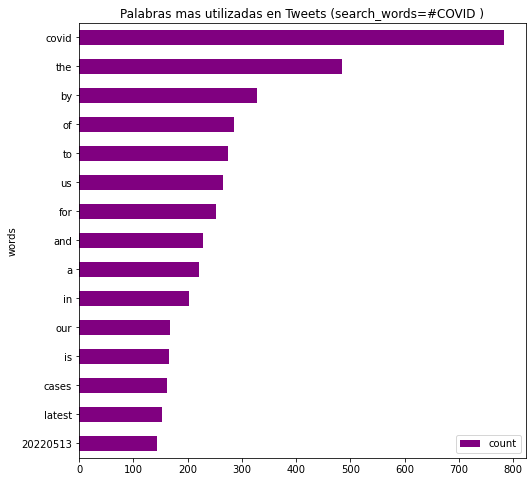

In [21]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(8,8))

#Grafica de barra horizontal
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',y='count',ax=ax, color="purple")
ax.set_title("Palabras mas utilizadas en Tweets (search_words=#COVID )")
plt.show()

# Sentiment Analysis

Se utiliza para identificar temas de interés. Se utiliza un rango de +1 a -1. Donde +1 es de mayor interés o de mayor positividad -1 es de menos interés o de mayor negatividad.

TextBlob se utilzia para calcular los valores de polaridad en tweets AI crear objetos TextBlob se puede identificar el valor de polaridad por medio del metodo polarity

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import collections
#conda install -c conda-forge textblob
from textblob import TextBlob

In [23]:
#Cambio climatico
search_term = "#climatechange -filter:retweets"
tweets = tw.Cursor(api.search_tweets, q=search_term, lang="en").items(1000)
# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [24]:
#Analisis de sentimientos en los tweets
#Creamos objetos textblob
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]
sentiment_objects[0].polarity, sentiment_objects[0] #imprime el primero

(0.0,
 TextBlob("Only 5 days left for the regular bird deadline Submit your films shorts drama comedy horror documentary"))

In [25]:
# Creamos una lista de polaridad por cada tweet
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_values

[[0.0,
  'Only 5 days left for the regular bird deadline Submit your films shorts drama comedy horror documentary'],
 [0.0,
  'A lot has changed since JustinTrudeau bought TransMountain in 2018 Costs are rising climatechange is worsening'],
 [0.0,
  'May 15ths DoodleADay is just some cottoncandyNOMOREWARS coviddistraction climatechange colouredpencils'],
 [0.0,
  'Nakba74 Trkei ClimateChange Esmeraldas Reparations fucktuckercarlson fucktrump Buffalo BLM Palestine'],
 [-0.35000000000000003,
  'Idiots Surprised COPOUT26 Ends in FailureCOP26Glasgow climatechange'],
 [-0.05,
  'The alarming increase in global disasters resulting from ClimateChange needs to be addressed with resolute interna'],
 [0.5,
  'I have grandchildren I care about ClimateChange more than almost anything else JamieforOregon will vote to hold'],
 [0.6000000000000001,
  'WritingVibes Scientific Fantasy Drama AN AMAZING LIFE c 20212022screenwriting amwritingfantasy amwriting'],
 [0.0,
  'Yes yes yes meatfree climatechang

In [26]:
#Creamos un df con la polaridad y el tweet
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity","tweet"])
sentiment_df.head()

,polarity,tweet
0,0.00,Only 5 days left for the regular bird deadline...
1,0.00,A lot has changed since JustinTrudeau bought T...
2,0.00,May 15ths DoodleADay is just some cottoncandyN...
3,0.00,Nakba74 Trkei ClimateChange Esmeraldas Reparat...
4,-0.35,Idiots Surprised COPOUT26 Ends in FailureCOP26...


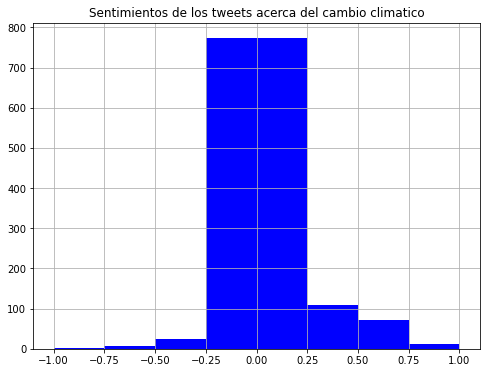

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1],ax = ax, color="blue")
plt.title("Sentimientos de los tweets acerca del cambio climatico")
plt.show()

In [28]:
#Podemos eliminar aquellos con polaridad igual a cero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

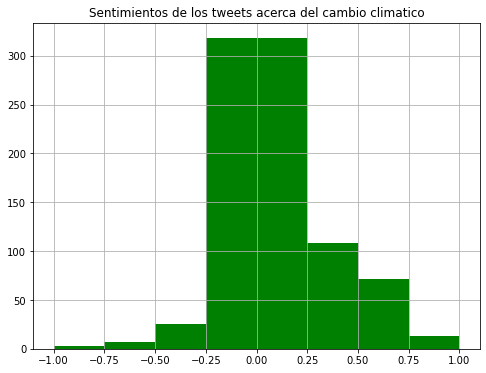

In [29]:
#Grafica sin tomar en cuenta polaridad = 0.0
fig, ax = plt.subplots(figsize=(8,6))
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.25,0.5,0.75,1],ax = ax, color="green")
plt.title("Sentimientos de los tweets acerca del cambio climatico")
plt.show()

In [30]:
# twython
# conda install -c conda-forge twithon
from twython import Twython
import json #para leer mis credenciales
import pandas as pd

In [31]:
tuits = Twython(consumer_key, consumer_secret, access_token,access_token_secret)

In [32]:
tuits.search(q="python", result_type="popular")

{'statuses': [{'created_at': 'Sun May 15 07:38:39 +0000 2022',
   'id': 1525742442011455490,
   'id_str': '1525742442011455490',
   'text': "Children of India - don't fall into this 'language' trap set by the politicians.\n\nThe only languages you should kno… https://t.co/gxbStBZev8",
   'truncated': True,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [],
    'urls': [{'url': 'https://t.co/gxbStBZev8',
      'expanded_url': 'https://twitter.com/i/web/status/1525742442011455490',
      'display_url': 'twitter.com/i/web/status/1…',
      'indices': [117, 140]}]},
   'metadata': {'result_type': 'popular', 'iso_language_code': 'en'},
   'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 28515858,
    'id_str': '28515858',
    '

In [33]:
consulta = {"q":"bigdata","result_type":"popular","favorite_count":50,"lang":"en"}

In [34]:
info = tuits.search(**consulta)["statuses"]

In [35]:
type(info)

list

In [36]:
info

[{'created_at': 'Sat May 14 04:01:37 +0000 2022',
  'id': 1525325435428544512,
  'id_str': '1525325435428544512',
  'text': 'Artificial Intelligence with #Python — a complete guide to building intelligent apps: https://t.co/ZQcEnw8NV4\n—————… https://t.co/KlnXudncjD',
  'truncated': True,
  'entities': {'hashtags': [{'text': 'Python', 'indices': [29, 36]}],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/ZQcEnw8NV4',
     'expanded_url': 'http://bit.ly/3c6blcr',
     'display_url': 'bit.ly/3c6blcr',
     'indices': [86, 109]},
    {'url': 'https://t.co/KlnXudncjD',
     'expanded_url': 'https://twitter.com/i/web/status/1525325435428544512',
     'display_url': 'twitter.com/i/web/status/1…',
     'indices': [117, 140]}]},
  'metadata': {'result_type': 'popular', 'iso_language_code': 'en'},
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'i

In [37]:
d= {"user":[], "date":[], "text":[], "favorite_count":[]}
for e in tuits.search(**consulta)["statuses"]:
    d["user"].append(e["user"]["screen_name"])
    d["date"].append(e["created_at"])
    d["text"].append(e["text"])
    d["favorite_count"].append(e["favorite_count"])
    
pandita = pd.DataFrame(d)
pandita.sort_values(by="favorite_count", inplace=True,ascending=False)

In [38]:
pandita

,user,date,text,favorite_count
0,KirkDBorne,Sat May 14 04:01:37 +0000 2022,Artificial Intelligence with #Python — a compl...,170
1,KirkDBorne,Sat May 14 04:07:44 +0000 2022,Learn about Pandas and NumPy for #DataScience:...,148
2,KirkDBorne,Sun May 15 04:25:56 +0000 2022,MIT Researchers Create Tool to Forecast Multiv...,76
3,SpirosMargaris,Sat May 14 16:47:56 +0000 2022,GoodRead\n\nThe #problem with #selfdrivingcars...,18
